### Import modules

In [1]:
import pathlib
import sqlite3

### Accessing the NEO database

In [2]:
# Accessing the NEO database
database_dir = pathlib.Path("../databases/neos/")
database_file = pathlib.Path("neodys.db")
database_filepath = database_dir / database_file

# Establish a connection to the database and set a cursor
neodys_db_con = sqlite3.connect(database_filepath)
neodys_db_cur = neodys_db_con.cursor()

In [3]:
import pandas as pd

# Get all information from the DB. Since the DB is rather small, this won't cause any issues!
neo_df = pd.read_sql("SELECT * FROM main", neodys_db_con)

# Close the database.
neodys_db_con.close()

In [4]:
neo_df

,Name,Epoch_MJD,SemMajAxis_AU,Ecc_,Incl_deg,LongAscNode_deg,ArgP_deg,MeanAnom_deg,AbsMag_,SlopeParamG_,Aphel_AU,Perihel_AU,NEOClass
0,433,60000.0,1.458129,0.222782,10.827822,304.287024,178.926986,110.777664,10.91,0.46,1.782974,1.133284,Amor
1,719,60600.0,2.636157,0.546780,11.575260,183.857164,156.215519,148.450677,15.54,0.15,4.077554,1.194760,Amor
2,887,60600.0,2.472525,0.571093,9.398799,110.423003,350.474251,340.198429,13.43,-0.12,3.884567,1.060483,Amor
3,1036,60600.0,2.665299,0.532826,26.686736,215.494967,132.496155,6.984966,9.47,0.30,4.085439,1.245159,Amor
4,1221,60600.0,1.920154,0.434718,11.868483,171.260813,26.717610,271.700798,17.43,0.15,2.754880,1.085428,Amor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37411,2025BZ1,60600.0,1.332160,0.186998,18.236821,308.499762,179.468173,295.799413,24.75,0.15,1.581271,1.083048,Amor
37412,2025BZ2,60600.0,1.547441,0.347306,12.393768,301.653113,217.970751,291.412078,26.29,0.15,2.084877,1.010006,Apollo
37413,6344P-L,60600.0,2.821108,0.661803,4.678521,182.791071,235.006174,213.375870,20.40,0.15,4.688125,0.954091,Apollo
37414,2025BQ7,60600.0,2.257766,0.500895,19.428948,134.964544,9.059571,325.461747,22.11,0.15,3.388669,1.126863,Amor


### Now we create a function to compute the size of the NEOs

In [5]:
import math
def comp_neo_diameter(abs_mag : float, albedo : float=0.15):
    """
    Function to compute the diameter of NEOs based on their absolute magnitude and albedo. If no
    albedo is provided, a default value of 0.15 is assumed.
    
    The result is provided in km.

    Parameters
    ----------
    abs_mag : float
        The NEO's absolute magnitude.
    albedo : float, default = 0.15
        The NEO's albedo.
    """
    
    # Compute the diameter in km
    neo_diam_km = ((10.0 ** (-0.2 * abs_mag))/(math.sqrt(albedo))) * 1329.0
    
    return neo_diam_km

In [6]:
import numpy as np

# Let's convert the absolute magnitude to the corresponding sizes
neo_diam_array = np.array([round(comp_neo_diameter(k),2) for k in neo_df["AbsMag_"]])

# Print some statistics
print(f"Known minimum NEO diameter: {np.min(neo_diam_array)} km")
print(f"Known maximum NEO diameter: {np.max(neo_diam_array)} km")
print(f"Mean NEO diameter: {np.mean(neo_diam_array)} km")
print(f"Median NEO diameter: {np.median(neo_diam_array)} km")

Known minimum NEO diameter: 0.0 km
Known maximum NEO diameter: 3173.07 km
Mean NEO diameter: 0.3370603485140047 km
Median NEO diameter: 0.06 km


In [7]:
# Some values appear to be ... weird. We check now the corresponding absolute magnitude
neo_df.sort_values(by="AbsMag_")[["Name", "AbsMag_"]]

,Name,AbsMag_
7653,2010LF64,0.17
7646,2010LB67,0.17
3,1036,9.47
0,433,10.91
14,1866,12.52
...,...,...
36395,2024UQ,32.90
25075,2021BO,32.95
36770,2024XA1,33.04
6524,2008TS26,33.18


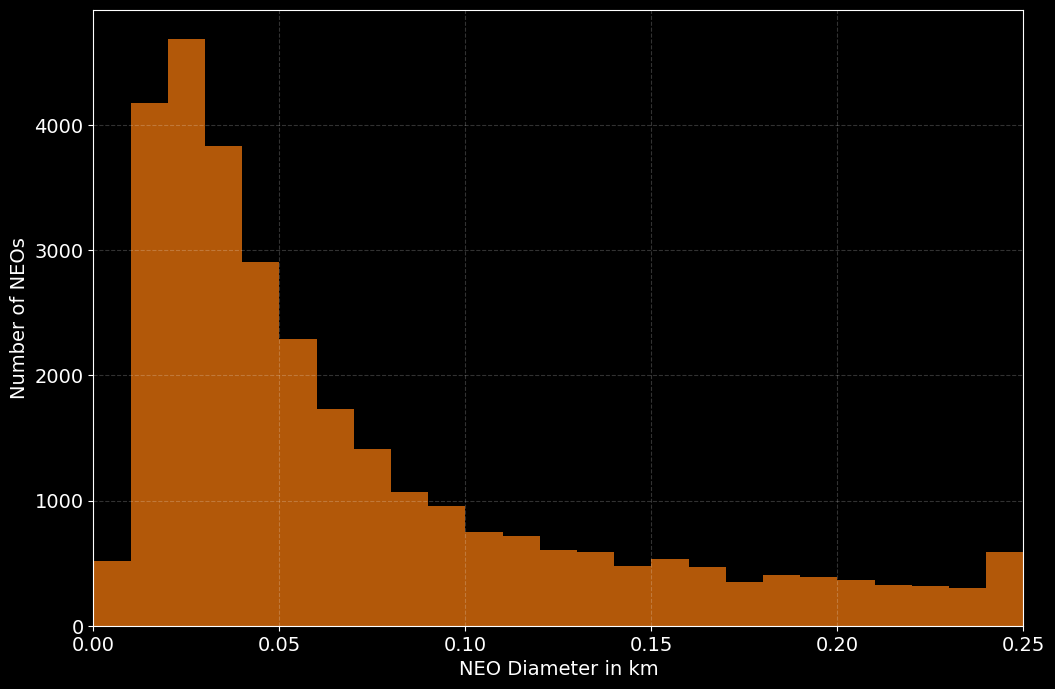

In [8]:
from matplotlib import pyplot as plt

# Define a histogram bins array
bins_range = np.arange(0, 0.26, 0.01)

# Let's set a dark background
plt.style.use('dark_background')

# Set a default font size for better readability
plt.rcParams.update({'font.size': 14})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a histogram of the absolute magnitude distribution
ax.hist(neo_diam_array, bins=bins_range, color='tab:orange', alpha=0.7)

# Set labels for the x and y axes
ax.set_xlabel('NEO Diameter in km')
ax.set_ylabel('Number of NEOs')

# Limit the xlim
ax.set_xlim(0, 0.25)

# Set a grid
ax.grid(axis='both', linestyle='dashed', alpha=0.2)

### Compute a cumulative distribution of the absolute magnitude

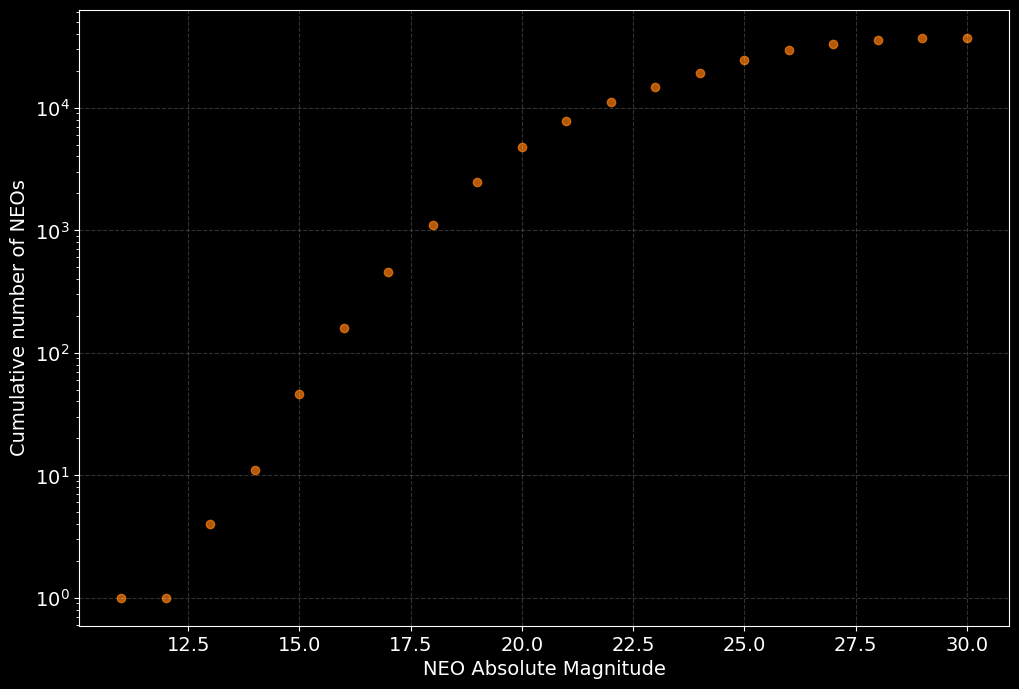

In [9]:
neo_absmag_hist, bins_edge = np.histogram(neo_df["AbsMag_"], \
                                       bins=np.arange(10.0, 31.0, 1.0))
cumul_neo_absmag_hist = np.cumsum(neo_absmag_hist)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a scatter plot of the cumulative distribution.
ax.scatter(bins_edge[:-1]+1, cumul_neo_absmag_hist, color='tab:orange', alpha=0.7, \
           marker='o')

# Set labels for the x and y axes
ax.set_xlabel('NEO Absolute Magnitude')
ax.set_ylabel('Cumulative number of NEOs')

# Set a grid
ax.grid(axis='both', linestyle='dashed', alpha=0.2)

# Set a logarithmic y axis
ax.set_yscale('log')

In [10]:
# Import modules
import pathlib
import sqlite3

In [11]:
# Accessing the NEO database
database_dir = pathlib.Path("../databases/neos/")
database_file = pathlib.Path("neodys.db")
database_filepath = database_dir / database_file

# Establish a connection to the database and set a cursor
neodys_db_con = sqlite3.connect(database_filepath)
neodys_db_cur = neodys_db_con.cursor()

In [12]:
import pandas as pd

# Get all information from the DB. Since the DB is rather small, this won't cause any issues!
neo_df = pd.read_sql("SELECT * FROM main", neodys_db_con)

# Close the database.
neodys_db_con.close()

In [13]:
neo_df

,Name,Epoch_MJD,SemMajAxis_AU,Ecc_,Incl_deg,LongAscNode_deg,ArgP_deg,MeanAnom_deg,AbsMag_,SlopeParamG_,Aphel_AU,Perihel_AU,NEOClass
0,433,60000.0,1.458129,0.222782,10.827822,304.287024,178.926986,110.777664,10.91,0.46,1.782974,1.133284,Amor
1,719,60600.0,2.636157,0.546780,11.575260,183.857164,156.215519,148.450677,15.54,0.15,4.077554,1.194760,Amor
2,887,60600.0,2.472525,0.571093,9.398799,110.423003,350.474251,340.198429,13.43,-0.12,3.884567,1.060483,Amor
3,1036,60600.0,2.665299,0.532826,26.686736,215.494967,132.496155,6.984966,9.47,0.30,4.085439,1.245159,Amor
4,1221,60600.0,1.920154,0.434718,11.868483,171.260813,26.717610,271.700798,17.43,0.15,2.754880,1.085428,Amor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37411,2025BZ1,60600.0,1.332160,0.186998,18.236821,308.499762,179.468173,295.799413,24.75,0.15,1.581271,1.083048,Amor
37412,2025BZ2,60600.0,1.547441,0.347306,12.393768,301.653113,217.970751,291.412078,26.29,0.15,2.084877,1.010006,Apollo
37413,6344P-L,60600.0,2.821108,0.661803,4.678521,182.791071,235.006174,213.375870,20.40,0.15,4.688125,0.954091,Apollo
37414,2025BQ7,60600.0,2.257766,0.500895,19.428948,134.964544,9.059571,325.461747,22.11,0.15,3.388669,1.126863,Amor


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()

### Creating quickly an overview plot with seaborn

(0.0, 35.0)

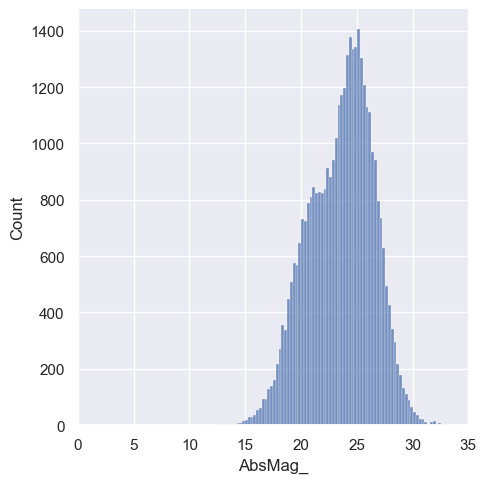

In [15]:
# Use bins=... to set the number of bins or
# bin_width=... to set the width of each bins. Quite easy!
sns_plt = sns.displot(neo_df, x="AbsMag_")
plt.xlim(0, 35)

(15.0, 30.0)

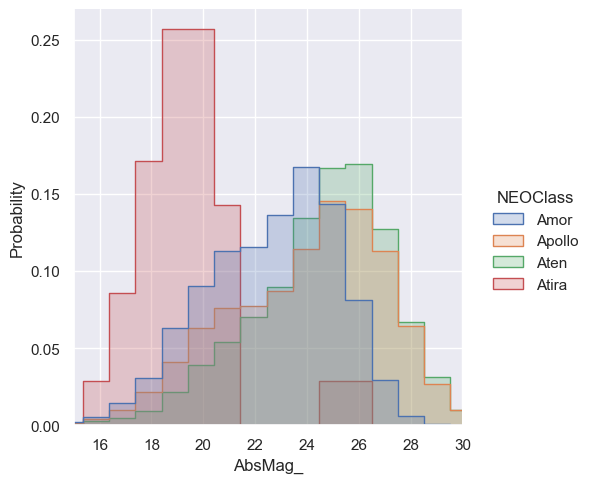

In [16]:
sns_plt = sns.displot(neo_df.loc[neo_df["NEOClass"] != "Other"],
                      x="AbsMag_",
                      hue="NEOClass",
                      element="step",
                      stat="probability",
                      common_norm=False,
                      binwidth=1)
plt.xlim(15, 30)

(0.5, 3.0)

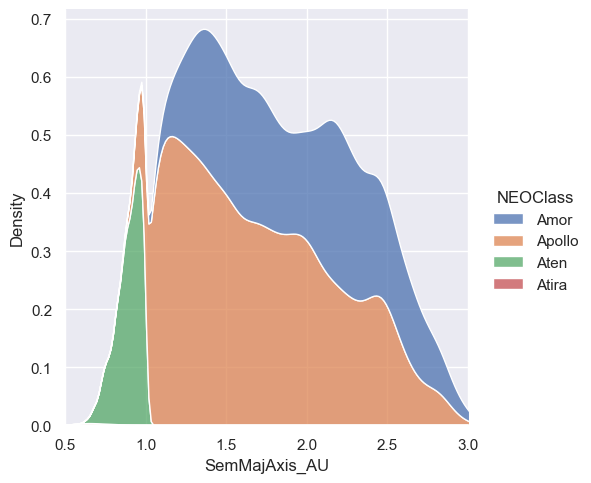

In [17]:
sns.displot(neo_df.loc[(neo_df["NEOClass"] != "Other") & (neo_df["SemMajAxis_AU"] < 3.0)],
            x="SemMajAxis_AU",
            hue="NEOClass",
            kind="kde",
            multiple="stack")
plt.xlim(0.5,3)

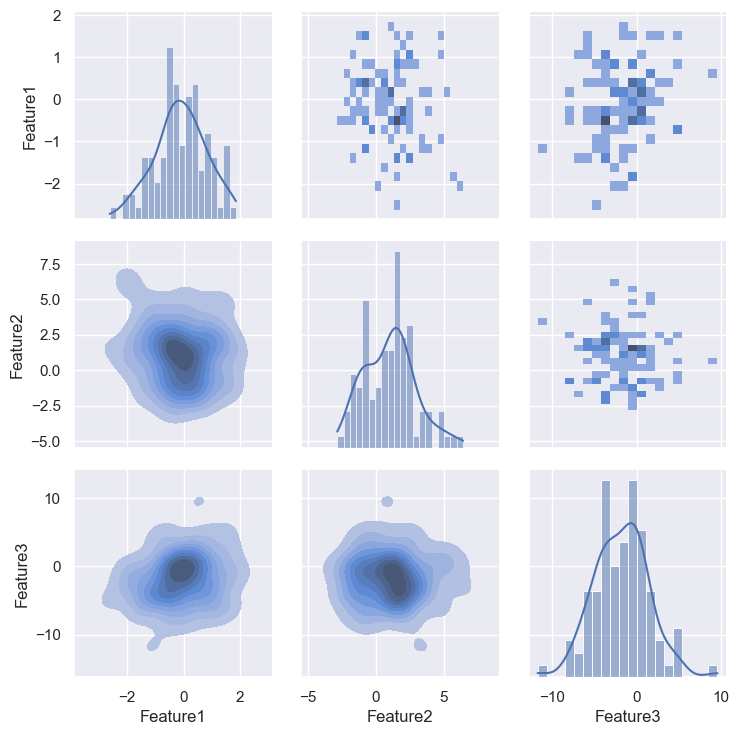

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = pd.DataFrame({
    'Feature1': np.random.randn(100),
    'Feature2': np.random.randn(100) * 2 + 1,
    'Feature3': np.random.randn(100) * 3 - 2
})

# Create a PairGrid instance
g = sns.PairGrid(data)

# Upper triangle: Histograms
g.map_upper(sns.histplot, bins=20)

# Lower triangle: KDE plot with fixed parameters to avoid errors
g.map_lower(sns.kdeplot, fill=True, warn_singular=False, levels=10)

# Diagonal: Histogram with KDE
g.map_diag(sns.histplot, kde=True, bins=20)

# Show the plot
plt.show()
